In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def p(x):
  return np.sqrt(2*np.pi) * np.exp(-x**2/2)

def q(x,m,s = 0.5):
  return 1/s * np.exp(-(x-m)/s)*np.exp(-np.exp(-(x-m)/s))


(array([  1.,   0.,   0.,   5.,   0.,   5.,   6.,   5.,   6.,  16.,  25.,
         12.,  19.,  29.,  19.,  30.,  25.,  59.,  46.,  73.,  64.,  73.,
         84.,  97., 118., 140., 191., 188., 239., 204., 221., 226., 268.,
        294., 320., 312., 320., 375., 367., 390., 383., 368., 349., 337.,
        333., 333., 328., 286., 316., 230., 183., 214., 199., 183., 192.,
        130., 117., 110.,  61.,  72.,  57.,  58.,  53.,  38.,  27.,  22.,
         35.,  11.,  17.,   8.,   1.,   1.,   4.,   4.,   1.,   0.,   1.,
          1.,  14.,   2.,   2.,   1.,   1.,   5.,   1.,   5.,   1.,  13.,
          0.,   2.,   1.,  10.,   2.,   1.,   0.,   0.,   1.,   1.,   1.,
          2.]),
 array([-3.53361403e+00, -3.44738944e+00, -3.36116486e+00, -3.27494027e+00,
        -3.18871569e+00, -3.10249110e+00, -3.01626652e+00, -2.93004193e+00,
        -2.84381735e+00, -2.75759276e+00, -2.67136817e+00, -2.58514359e+00,
        -2.49891900e+00, -2.41269442e+00, -2.32646983e+00, -2.24024525e+00,
        -2.154

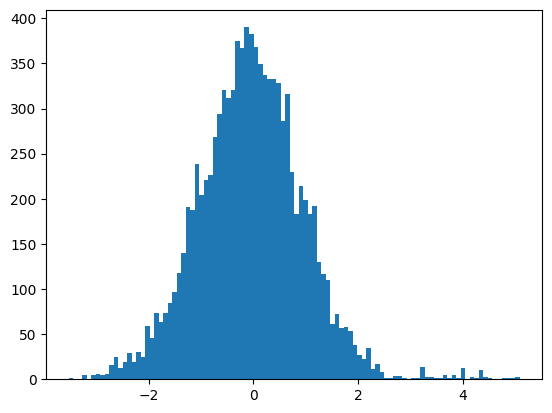

In [ ]:
T = 10000  # 시뮬레이션 반복 횟수
x = 5  # 초기 x 값
xlist = [x]  # x 값들을 저장할 리스트

# T번 반복하여 Metropolis 알고리즘을 수행
for i in range(T):
    next_x = x  # 현재 x 값
    xstar = np.random.gumbel(loc=next_x, scale=0.5)  # 제안 분포로부터 새로운 xstar 값을 샘플링
    # 계산할 acceptance ratio (alpha) 계산
    alpha = min(1, (p(xstar) * q(x=next_x, m=xstar)) / (p(next_x) * q(x=xstar, m=next_x)))

    # Metropolis 알고리즘에 따라 x 값 업데이트
    if alpha == 1:
        x = xstar  # alpha가 1이면 항상 새로운 xstar를 선택
        xlist.append(x)  # x 값을 리스트에 추가
    else:
        u = rd.uniform(0, 1)  # 0과 1 사이의 균일 분포에서 난수 u 생성
        if u < alpha:
            x = xstar  # alpha보다 u가 작으면 새로운 xstar를 선택
            xlist.append(x)  # x 값을 리스트에 추가
        else:
            xlist.append(next_x)  # 아니면 현재 x 값을 유지하고 리스트에 추가

# 결과 시각화: x 값들의 히스토그램을 그림
plt.hist(xlist, bins=100)
